# Image compression using PCA

In [4]:

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [5]:
# The sharable Link
link = 'https://drive.google.com/file/d/1fvM1QJt75e1rNG0C4AMfos1aJd7cXtIU'

# Get id from link
fluff, id = link.split('d/')
print (id)

# Get File from Gdrive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.jpg')

1fvM1QJt75e1rNG0C4AMfos1aJd7cXtIU


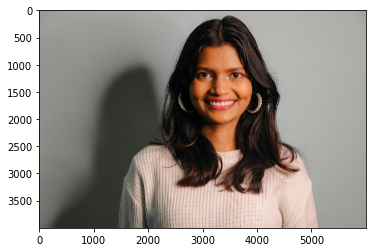

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

img = cv2.cvtColor(cv2.imread('test.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [7]:
img.shape

(4000, 6000, 3)

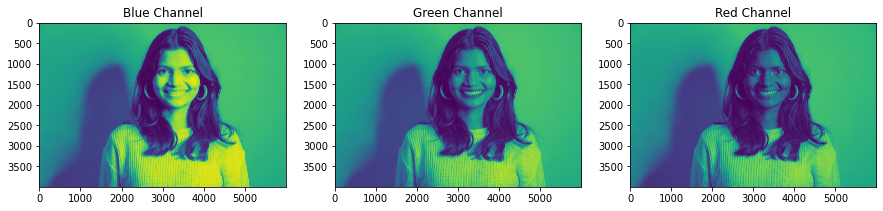

In [8]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [9]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,150,152,153,153,152,152,153,155,151,152,...,157,157,159,157,156,157,159,160,157,155
1,151,152,152,152,150,150,152,153,153,153,...,156,156,158,156,156,157,158,158,157,156
2,152,152,151,150,148,148,150,151,154,153,...,156,156,156,156,156,156,157,157,157,157
3,152,152,151,150,149,149,149,150,153,152,...,156,156,155,156,157,157,156,157,158,159
4,152,152,152,151,151,150,150,150,153,152,...,157,156,156,156,157,157,157,157,158,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,108,106,105,105,104,102,101,102,103,104,...,153,154,154,154,155,154,154,152,151,150
3996,109,107,106,106,106,106,106,107,108,106,...,154,155,154,154,155,155,155,154,152,152
3997,108,106,105,106,108,109,110,111,111,109,...,156,156,154,154,154,155,154,154,154,154
3998,107,104,102,104,106,109,110,112,111,110,...,156,156,154,154,153,153,153,154,155,155


In [10]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [11]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [12]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(4000, 50)
(4000, 50)
(4000, 50)


In [13]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.982050582701522
Green Channel: 0.9779334040310457
Red Channel  : 0.9772477679960045


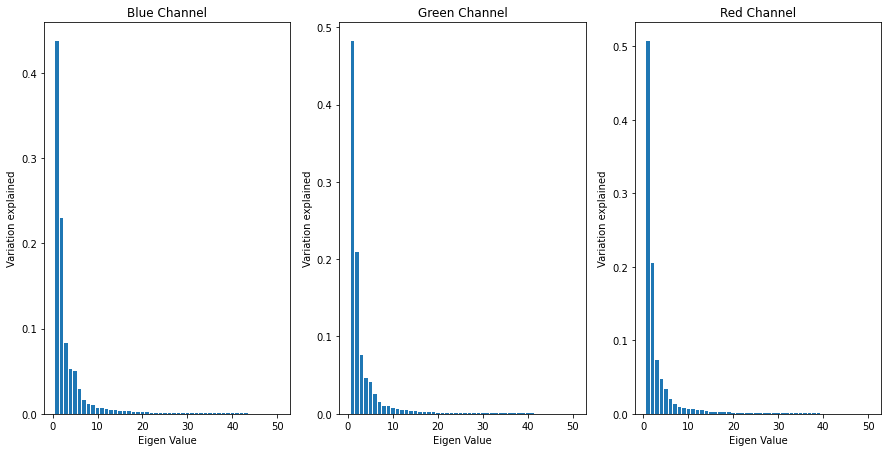

In [14]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [15]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(4000, 6000) (4000, 6000) (4000, 6000)


In [16]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(4000, 6000, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


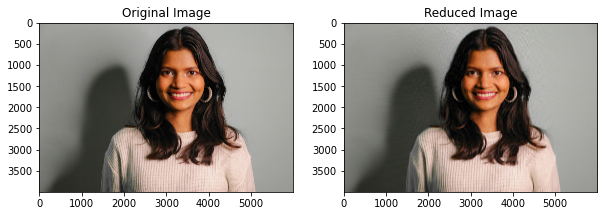

In [17]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()